In [1]:
from __future__ import print_function

import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
import json

from cifar10vgg import cifar10vgg
from mnistcnn import mnistcnn
from noise import noisy, check_noise_robustness_multiple_rounds
from data_manager import load_data

from IPython.display import clear_output

%config Completer.use_jedi = False

In [2]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = load_data("mnist")

In [3]:
model_mnist = mnistcnn(train = False)

In [60]:
len(x_train_mnist)

60000

In [66]:
sample_size_mnist_train = 60000
sample_x_train_mnist = np.copy(x_train_mnist[:sample_size_mnist_train])
sample_y_train_mnist = np.copy(y_train_mnist[:sample_size_mnist_train])

sample_size_mnist = len(x_test_mnist)
sample_x_test_mnist = np.copy(x_test_mnist[:sample_size_mnist])
sample_y_test_mnist = np.copy(y_test_mnist[:sample_size_mnist])

In [64]:
STEPS = 250
sum(np.argmax(model_mnist.predict(sample_x_test_mnist),1) == np.argmax(sample_y_test_mnist,1))

98

Previous robustness:  0.7129833333333333


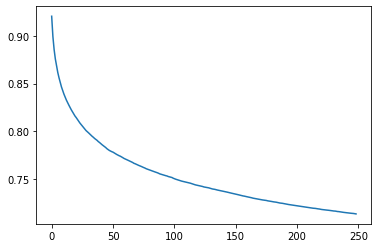

In [65]:
agreements_cell_train_mnist, saved_noisy_imgs_cell_train_mnist = check_noise_robustness_multiple_rounds(
    model_mnist, 
    sample_x_train_mnist, 
    sample_y_train_mnist, 
    STEPS, 
    noise_type="cells",
    args={"cell_count":28}
)

In [70]:
robust_img_indices = list(map(lambda x: list(x) == list([]), saved_noisy_imgs_cell_train_mnist))
X_train_robust = sample_x_train_mnist[robust_img_indices]
Y_train_robust = sample_y_train_mnist[robust_img_indices]
# np.array(list(map(lambda x: list(x) == list([]), saved_noisy_imgs_cell_train_mnist))).sum()
# sample_x_train_mnist[list(map(lambda x: list(x) == list([]), saved_noisy_imgs_cell_train_mnist))]

In [72]:
np.savez("test.npz", X_train_robust, Y_train_robust)

In [88]:
tx = np.load("test.npz")
len(tx["arr_0"])
len(tx["arr_1"])
np.shape(tx["arr_0"])

(42767, 28, 28, 1)

Previous robustness:  0.7157


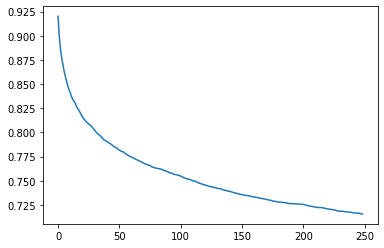

In [67]:
agreements_cell_test_mnist, saved_noisy_imgs_cell_test_mnist = check_noise_robustness_multiple_rounds(
    model_mnist, 
    sample_x_test_mnist, 
    sample_y_test_mnist, 
    STEPS, 
    noise_type="cells",
    args={"cell_count":28}
)

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data("cifar10")

In [7]:
model = cifar10vgg(train = False)

predicted_x = model.predict(x_test)
residuals = np.argmax(predicted_x,1)!=np.argmax(y_test, 1)

loss = sum(residuals)/len(residuals)
print("the validation 0/1 loss is: ",loss)

residuals = np.argmax(predicted_x,1)==np.argmax(y_test, 1)
acc = sum(residuals)/len(residuals)
print("Top-1 accuracy:", acc)

the validation 0/1 loss is:  0.0641
Top-1 accuracy: 0.9359


In [8]:
sample_size = 100
sample_x_train = np.copy(x_train[:sample_size])
sample_y_train = np.copy(y_train[:sample_size])

sample_x_test = np.copy(x_test[:sample_size])
sample_y_test = np.copy(y_test[:sample_size])

In [9]:
sample_train_pred = model.predict(sample_x_train)

In [10]:
sample_test_pred = model.predict(sample_x_test)

In [11]:
train_sample_accuracy =  (np.argmax(sample_train_pred, 1) == np.argmax(sample_y_train, 1)).sum() / len(sample_train_pred)
(np.argmax(sample_train_pred, 1) == np.argmax(sample_y_train, 1)).sum()

100

In [12]:
test_sample_accuracy =  (np.argmax(sample_test_pred, 1) == np.argmax(sample_y_test, 1)).sum() / len(sample_test_pred)
test_sample_accuracy

0.95

In [13]:
y_train_pred = model.predict(x_train)

In [14]:
train_acc = (np.argmax(y_train_pred, 1) == np.argmax(y_train, 1)).sum() / len(x_train)

In [15]:
y_test_pred = model.predict(x_test)

In [16]:
test_acc = (np.argmax(y_test_pred, 1) == np.argmax(y_test, 1)).sum() / len(x_test)

In [17]:
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)
STEPS = 10

Train accuracy: 0.99982
Test accuracy: 0.9359


In [1]:
agreements_cell_train, saved_noisy_imgs_cell_train = check_noise_robustness_multiple_rounds(model, sample_x_train, sample_y_train, STEPS, noise_type="cells")

NameError: name 'check_noise_robustness_multiple_rounds' is not defined

<h3>For the 1024 pixels images we perturb at random only 32 of them ($\mathcal{O}(\sqrt{n})$ pixels)</h3>

Step 149
Previous robustness:  0.481


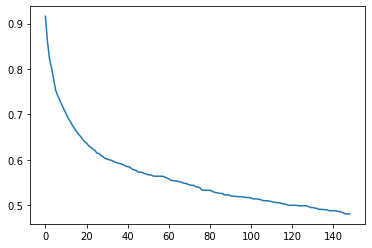

In [17]:
agreements_cell_train, saved_noisy_imgs_cell_train = check_noise_robustness_multiple_rounds(model, sample_x_train, sample_y_train, STEPS, noise_type="cells")

Step 149
Previous robustness:  0.425


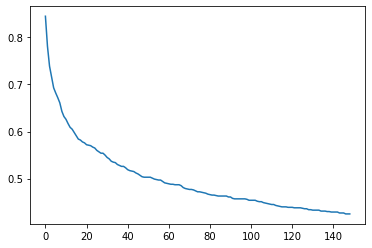

In [18]:
agreements_cell_test, saved_noisy_imgs_cell_test = check_noise_robustness_multiple_rounds(model, sample_x_test, sample_y_test, STEPS, noise_type="cells")

<h3>Gaussian noise added to all the pixels with high std and mean 0, which however yields easily understandable pictures (see examples at the end of the code)</h3>

Step 149
Previous robustness:  0.62


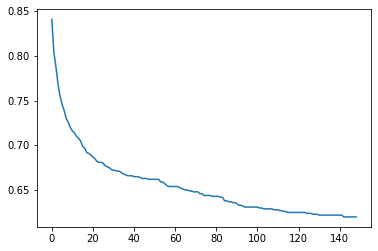

In [19]:
agreements_gauss_train, saved_noisy_imgs_gauss_train = check_noise_robustness_multiple_rounds(model, sample_x_train, sample_y_train, STEPS, noise_type="gauss")

Step 149
Previous robustness:  0.544


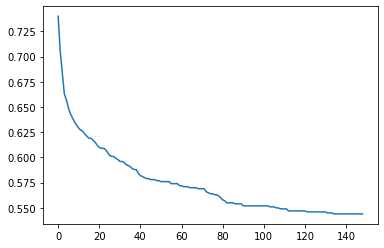

In [20]:
agreements_gauss_test, saved_noisy_imgs_gauss_test = check_noise_robustness_multiple_rounds(model, sample_x_test, sample_y_test, STEPS, noise_type="gauss")

<h3>For the 1024 pixels images we perturb at random only 10 of them ($\mathcal{O}(\log{n})$ pixels)</h3>

Step 149
Previous robustness:  0.828


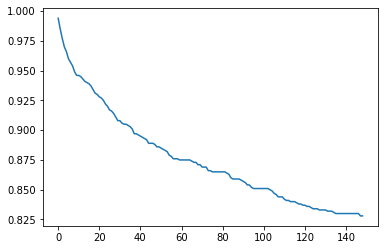

In [21]:
agreements_logcell_train, saved_noisy_imgs_logcell_train = check_noise_robustness_multiple_rounds(model, sample_x_train, sample_y_train, STEPS, noise_type="cells", args={"cell_count":10})

Step 149
Previous robustness:  0.682


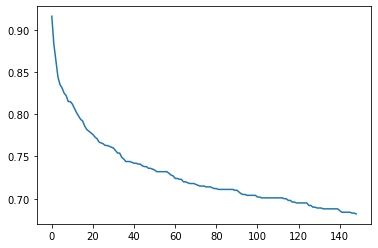

In [22]:
agreements_logcell_test, saved_noisy_imgs_logcell_test = check_noise_robustness_multiple_rounds(model, sample_x_test, sample_y_test, STEPS, noise_type="cells", args={"cell_count":10})

Sanity check, perturbing almost all pixels (perturbations are with repetitions, therefore not exatly all) yields accuracy of approximately 1/10

In [37]:
bs1, bs2 = check_noise_robustness_multiple_rounds(model, sample_x_test, sample_y_test, 1, noise_type="cells", args={"cell_count":32*32})

Step 0


In [39]:
bs1.sum()/len(bs1)

0.112

In [23]:
test_gauss_and_cell_robustness = np.logical_and(agreements_gauss_test, agreements_cell_test).sum()/len(agreements_gauss_test)
train_gauss_and_cell_robustness = np.logical_and(agreements_gauss_train, agreements_cell_train).sum()/len(agreements_gauss_train)

In [25]:
import pandas as pd

In [26]:
train_cell_robustness = (agreements_cell_train).sum()/len(agreements_cell_train)
test_cell_robustness = (agreements_cell_test).sum()/len(agreements_cell_test)
train_gauss_robustness = (agreements_gauss_train).sum()/len(agreements_gauss_train)
test_gauss_robustness = (agreements_gauss_test).sum()/len(agreements_gauss_test)
train_logcell_robustness = agreements_logcell_train.sum()/len(agreements_logcell_train)
test_logcell_robustness = agreements_logcell_test.sum()/len(agreements_logcell_test)

In [40]:
df = pd.DataFrame(
    [
        [train_sample_accuracy, test_sample_accuracy],
        [train_cell_robustness, test_cell_robustness],
        [train_gauss_robustness, test_gauss_robustness],
        [train_gauss_and_cell_robustness, test_gauss_and_cell_robustness],
        [train_logcell_robustness, test_logcell_robustness]
    ], 
    columns=["Train", "Test"], 
    index=["Accuracy", "Sqrt cell robustness", "Gauss robustness", "Cell&gauss robustness", "Log cell robustness"]
)

In [41]:
df

,Train,Test
Accuracy,1.000,0.938
Sqrt cell robustness,0.481,0.423
Gauss robustness,0.619,0.544
Cell&gauss robustness,0.385,0.343
Log cell robustness,0.828,0.682


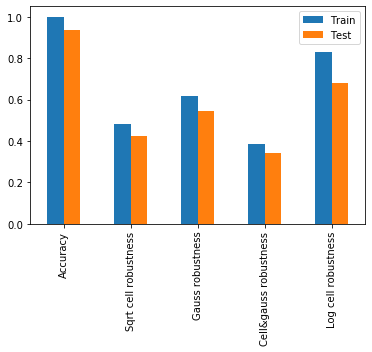

In [42]:
df.plot.bar()

In [ ]:
model = cifar10vgg(train=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
223/391 [================>.............] - ETA: 33:43 - loss: 23.6405 - acc: 0.1630